In [3]:
import pandas as pd
import numpy as np

In [4]:
#reading 2020 Jan week1 data
df_jan2020 = pd.read_csv('195JourneyDataExtract01Jan2020-07Jan2020.csv')
juneWeek1 =  pd.read_csv("217JourneyDataExtract03Jun2020-09Jun2020.csv")

In [5]:
df_jan2020

Rental Id  Duration  Bike Id          End Date  EndStation Id  \
0        94113398       960     6800  07/01/2020 14:07            541   
1        94117049       600     8691  07/01/2020 17:06             48   
2        94110497       540      531  07/01/2020 11:01            654   
3        94050449       600     8150  04/01/2020 12:27            685   
4        94019122      1140    15515  02/01/2020 16:31            676   
...           ...       ...      ...               ...            ...   
126796   94067445       360    14461  05/01/2020 13:25            183   
126797   94105080      1260    16363  07/01/2020 08:50            129   
126798   94056128       780     3351  04/01/2020 16:11            376   
126799   94115074       420    16831  07/01/2020 15:40            695   
126800   94068357       180    12421  05/01/2020 14:04            439   

                     EndStation Name        Start Date  StartStation Id  \
0        Green Park Station, Mayfair  07/01/2020 13:51              164   
1        Godliman Street, St. Paul's  07/01/2020 16:56              323   
2               Ashmole Estate, Oval  07/01/2020 10:52              624   
3            Osiers Road, Wandsworth  04/01/2020 12:17              774   
4         Hartington Road, Stockwell  02/01/2020 16:12               83   
...                              ...               ...              ...   
126796   Riverlight North, Nine Elms  05/01/2020 13:19              800   
126797           Golden Square, Soho  07/01/2020 08:29              804   
126798       Millbank Tower, Pimlico  04/01/2020 15:58              800   
126799        Islington Green, Angel  07/01/2020 15:33              804   
126800  Killick Street, King's Cross  05/01/2020 14:01              804   

                      StartStation Name  
0          Cleveland Gardens, Bayswater  
1            Clifton Street, Shoreditch  
2       Courland Grove, Wandsworth Road  
3        Hurlingham Park, Parsons Green  
4               Panton Street, West End  
...                                 ...  
126796      Sopwith Way, Battersea Park  
126797         Good's Way, King's Cross  
126798      Sopwith Way, Battersea Park  
126799         Good's Way, King's Cross  
126800         Good's Way, King's Cross  

[126801 rows x 9 columns]

In [21]:
df_jan2020.max()

Rental Id                         94127775
Duration                            547320
Bike Id                              17042
End Date                  07/01/2020 23:59
EndStation Id                          839
EndStation Name      York Way, Kings Cross
Start Date                07/01/2020 23:53
StartStation Id                        839
StartStation Name    York Way, Kings Cross
dtype: object

In [22]:
juneWeek1.max()

Rental Id                         98038185
Duration                            500880
Bike Id                              17546
End Date                  09/06/2020 23:59
EndStation Id                          839
EndStation Name      York Way, Kings Cross
Start Date                09/06/2020 23:55
StartStation Id                        839
StartStation Name    York Way, Kings Cross
dtype: object

In [6]:
#df_jan2020["Ended Journeys"]

## Processing Original Data Frame

In [7]:
# New DataFrame from extracted Start Station Data from original data Set
startedJourneys = pd.DataFrame(juneWeek1[["StartStation Id", "StartStation Name", "Start Date"]])

In [8]:
#sort the bike rides in chronological order for the first week of January
startedJourneys["Start Date"] = pd.to_datetime(startedJourneys["Start Date"], format='%d/%m/%Y %H:%M')
startedJourneys.sort_values(by= "Start Date", inplace=True)
startedJourneys

StartStation Id                      StartStation Name  \
158698              239          Warren Street Station, Euston   
89974               333   Palace Gardens Terrace, Notting Hill   
195254              528                Clarges Street, Mayfair   
77671                99          Old Quebec Street, Marylebone   
94806               521               Driffield Road, Old Ford   
...                 ...                                    ...   
27257               252            Jubilee Gardens, South Bank   
187960              270  Kennington Lane Rail Bridge, Vauxhall   
183702              757        Harcourt Terrace, West Brompton   
130936              191            Hyde Park Corner, Hyde Park   
150661              191            Hyde Park Corner, Hyde Park   

                Start Date  
158698 2020-06-03 00:00:00  
89974  2020-06-03 00:00:00  
195254 2020-06-03 00:01:00  
77671  2020-06-03 00:01:00  
94806  2020-06-03 00:01:00  
...                    ...  
27257  2020-06-09 23:51:00  
187960 2020-06-09 23:51:00  
183702 2020-06-09 23:53:00  
130936 2020-06-09 23:54:00  
150661 2020-06-09 23:55:00  

[214151 rows x 3 columns]

## Total Number of Borrow and Return Requests per Station

In [9]:
# Introduce column for total number of journeys that start at each station in this week
stationWeeklyDemandStart = pd.DataFrame(df_jan2020[["StartStation Id", "StartStation Name"]].value_counts())
stationWeeklyDemandStart.columns = ["Total Num of Journeys that Start at Station"]
stationWeeklyDemandStart

Total Num of Journeys that Start at Station
StartStation Id StartStation Name                                                            
14              Belgrove Street , King's Cross                                            987
374             Waterloo Station 1, Waterloo                                              967
191             Hyde Park Corner, Hyde Park                                               824
154             Waterloo Station 3, Waterloo                                              707
303             Albert Gate, Hyde Park                                                    674
...                                                                                       ...
608             Colet Gardens, Hammersmith                                                 17
744             Ingrave Street, Clapham Junction                                           17
519             Teviot Street, Poplar                                                      15
504             St. John's Park, Cubitt Town                                                7
494             South Quay East, Canary Wharf                                               7

[787 rows x 1 columns]

In [10]:
# Introduce column for total number of journeys that end at each station in this week
stationWeeklyDemandEnd = pd.DataFrame(df_jan2020[["EndStation Id", "EndStation Name"]].value_counts())
stationWeeklyDemandEnd.columns = ["Total Num of Journeys that End Station"]
stationWeeklyDemandEnd.head()

Total Num of Journeys that End Station
EndStation Id EndStation Name                                                       
14            Belgrove Street , King's Cross                                     962
374           Waterloo Station 1, Waterloo                                       937
191           Hyde Park Corner, Hyde Park                                        821
194           Hop Exchange, The Borough                                          733
303           Albert Gate, Hyde Park                                             700

In [20]:
# Concatenate Columns from total number borrow and return requests
StationDemand = pd.concat([stationWeeklyDemandStart, stationWeeklyDemandEnd], axis=1, names=["Station Id", "Station Name"])
#StationDemand.columns = ["Station Id", "Station Name"]
StationDemand

Total Num of Journeys that Start at Station  \
14  Belgrove Street , King's Cross                                            987   
374 Waterloo Station 1, Waterloo                                              967   
191 Hyde Park Corner, Hyde Park                                               824   
154 Waterloo Station 3, Waterloo                                              707   
303 Albert Gate, Hyde Park                                                    674   
...                                                                           ...   
608 Colet Gardens, Hammersmith                                                 17   
744 Ingrave Street, Clapham Junction                                           17   
519 Teviot Street, Poplar                                                      15   
504 St. John's Park, Cubitt Town                                                7   
494 South Quay East, Canary Wharf                                               7   

                                      Total Num of Journeys that End Station  
14  Belgrove Street , King's Cross                                       962  
374 Waterloo Station 1, Waterloo                                         937  
191 Hyde Park Corner, Hyde Park                                          821  
154 Waterloo Station 3, Waterloo                                         637  
303 Albert Gate, Hyde Park                                               700  
...                                                                      ...  
608 Colet Gardens, Hammersmith                                            17  
744 Ingrave Street, Clapham Junction                                      35  
519 Teviot Street, Poplar                                                  8  
504 St. John's Park, Cubitt Town                                          14  
494 South Quay East, Canary Wharf                                          6  

[787 rows x 2 columns]

In [12]:
StationDemand["Total Demand"]= StationDemand["Total Num of Journeys that Start at Station"]+ StationDemand["Total Num of Journeys that End Station"]
StationDemand = StationDemand.sort_values(by="Total Demand", ascending=False)
StationDemand.head(10)

Total Num of Journeys that Start at Station  \
14  Belgrove Street , King's Cross                                          987   
374 Waterloo Station 1, Waterloo                                            967   
191 Hyde Park Corner, Hyde Park                                             824   
303 Albert Gate, Hyde Park                                                  674   
154 Waterloo Station 3, Waterloo                                            707   
...                                                                         ...   
767 Santos Road, Wandsworth                                                  29   
608 Colet Gardens, Hammersmith                                               17   
519 Teviot Street, Poplar                                                    15   
504 St. John's Park, Cubitt Town                                              7   
494 South Quay East, Canary Wharf                                             7   

                                    Total Num of Journeys that End Station  \
14  Belgrove Street , King's Cross                                     962   
374 Waterloo Station 1, Waterloo                                       937   
191 Hyde Park Corner, Hyde Park                                        821   
303 Albert Gate, Hyde Park                                             700   
154 Waterloo Station 3, Waterloo                                       637   
...                                                                    ...   
767 Santos Road, Wandsworth                                             14   
608 Colet Gardens, Hammersmith                                          17   
519 Teviot Street, Poplar                                                8   
504 St. John's Park, Cubitt Town                                        14   
494 South Quay East, Canary Wharf                                        6   

                                    Total Demand  
14  Belgrove Street , King's Cross          1949  
374 Waterloo Station 1, Waterloo            1904  
191 Hyde Park Corner, Hyde Park             1645  
303 Albert Gate, Hyde Park                  1374  
154 Waterloo Station 3, Waterloo            1344  
...                                          ...  
767 Santos Road, Wandsworth                   43  
608 Colet Gardens, Hammersmith                34  
519 Teviot Street, Poplar                     23  
504 St. John's Park, Cubitt Town              21  
494 South Quay East, Canary Wharf             13  

[787 rows x 3 columns]

## Demand vs Station

In [13]:
#stationWeeklyDemandEnd.pivot(index="", cou)

<AxesSubplot:xlabel='EndStation Id,EndStation Name', ylabel='demand'>

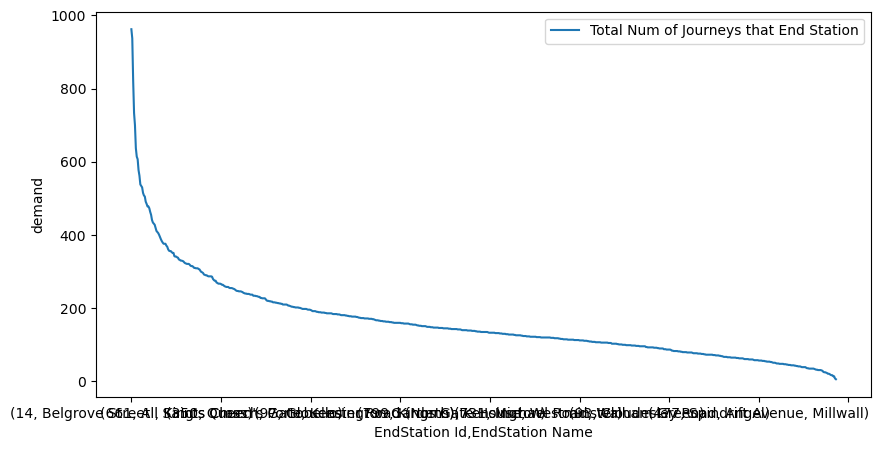

In [14]:
stationWeeklyDemandEnd.plot(kind="line", figsize=(10,5), ylabel="demand")

<AxesSubplot:xlabel='Station ID & Name', ylabel='Demand'>

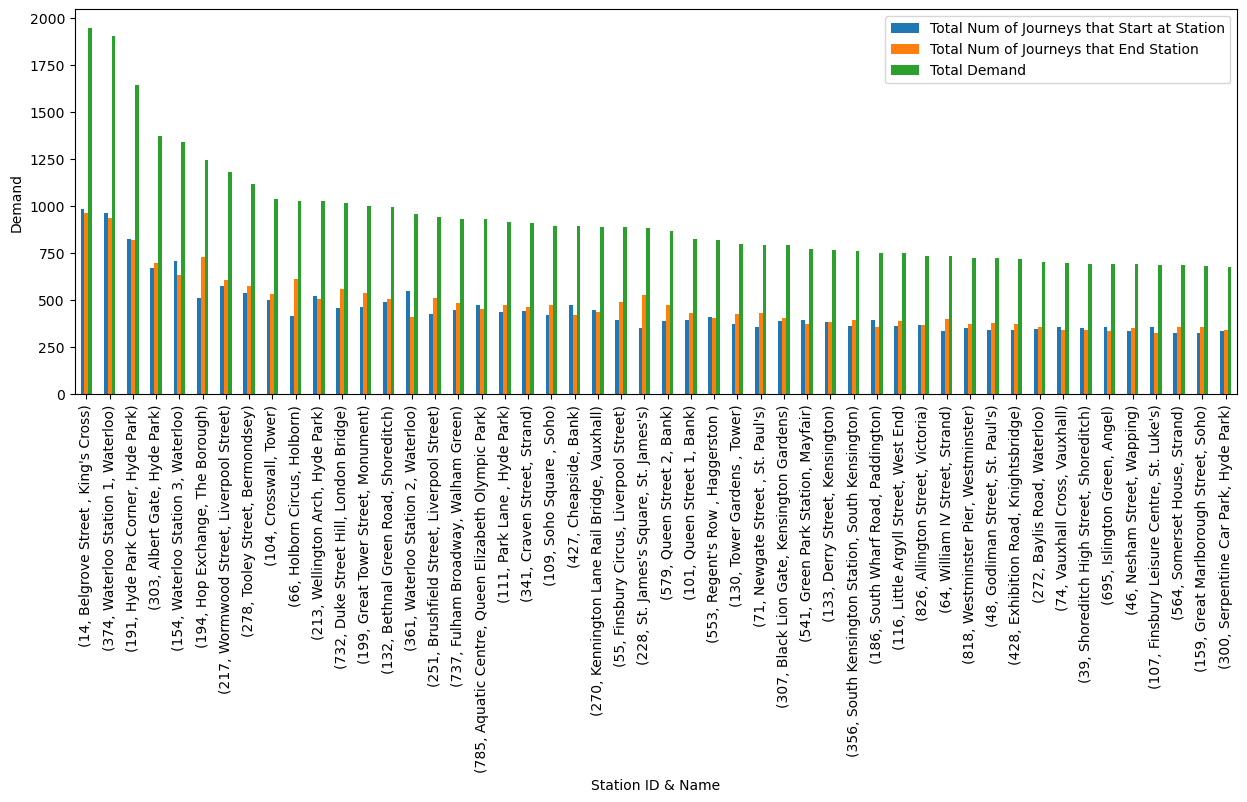

In [15]:
# Top 50 stations with highest weekly Demand (total successful borrow and return requests) 
StationDemand.head(50).plot(kind="bar", figsize=(15,5), ylabel="Demand", xlabel="Station ID & Name")

## Demand vs Time

### Columns = first 7 days, lines should be stations, y axis should be demand

In [16]:
# Takes DF in format MainDataFrame[["StartStation Id", "StartStation Name", "Start Date"]]

#sort the bike rides in chronological order for the week
startedJourneys["Start Date"] = pd.to_datetime(startedJourneys["Start Date"], format='%d/%m/%Y %H:%M')
startedJourneys.sort_values(by= "Start Date", inplace=True)

# demandByTime
# Create a new column that separeates data per day and counts how many bike borrow requests per station
startedJourneys["Day/Month"] = startedJourneys["Start Date"].apply(lambda x: "%d/%d %a" % (x.day, x.month, x.day_name()))
counterDailyJourneyStarts = startedJourneys.groupby(["Day/Month", "StartStation Name"], as_index=False).size()
#counterDailyJourneyStarts.sort_values(by="Day/Month")
counterDailyJourneyStarts

Day/Month                  StartStation Name  size
0     3/6 'Wednesday'  Abbey Orchard Street, Westminster    41
1     3/6 'Wednesday'      Abbotsbury Road, Holland Park    18
2     3/6 'Wednesday'    Aberdeen Place, St. John's Wood    19
3     3/6 'Wednesday'           Aberfeldy Street, Poplar    17
4     3/6 'Wednesday'        Abingdon Green, Westminster    70
...               ...                                ...   ...
5442    9/6 'Tuesday'               Wren Street, Holborn    13
5443    9/6 'Tuesday'          Wright's Lane, Kensington    42
5444    9/6 'Tuesday'              Wynne Road, Stockwell    10
5445    9/6 'Tuesday'           York Hall, Bethnal Green    33
5446    9/6 'Tuesday'              York Way, Kings Cross    33

[5447 rows x 3 columns]

<AxesSubplot:ylabel='demand'>

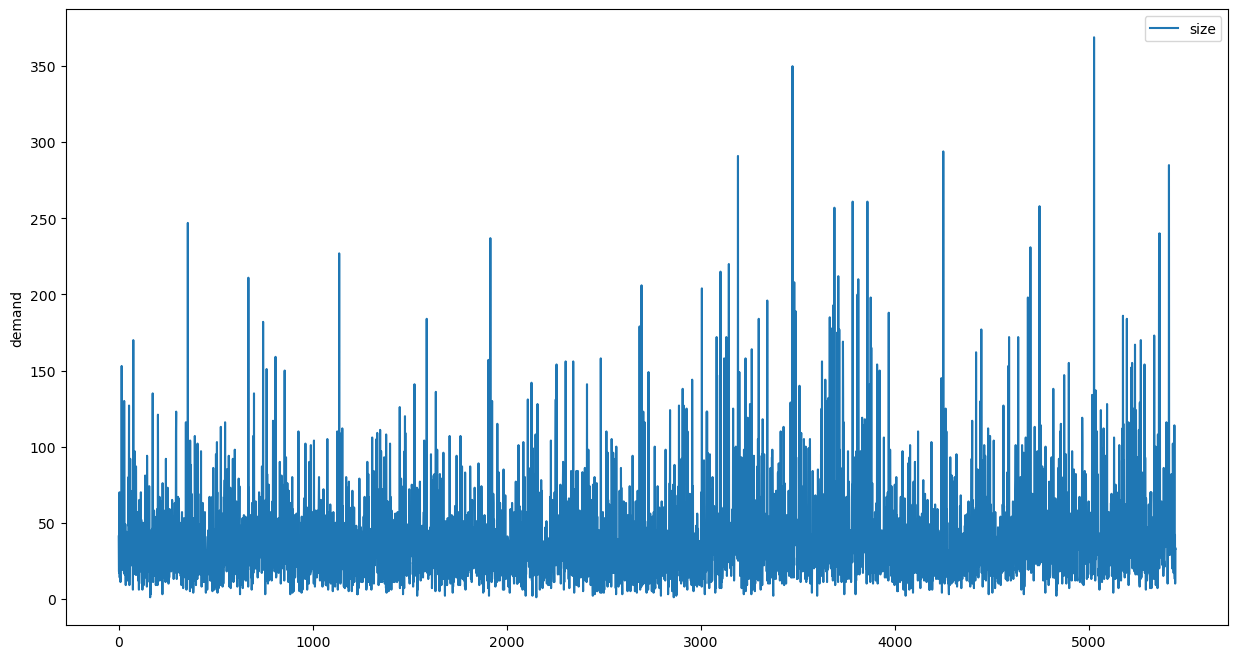

In [17]:
counterDailyJourneyStarts.plot(kind="line", figsize=(15,8), ylabel="demand")

<AxesSubplot:xlabel='Day/Month', ylabel='Number of Journeys Started'>

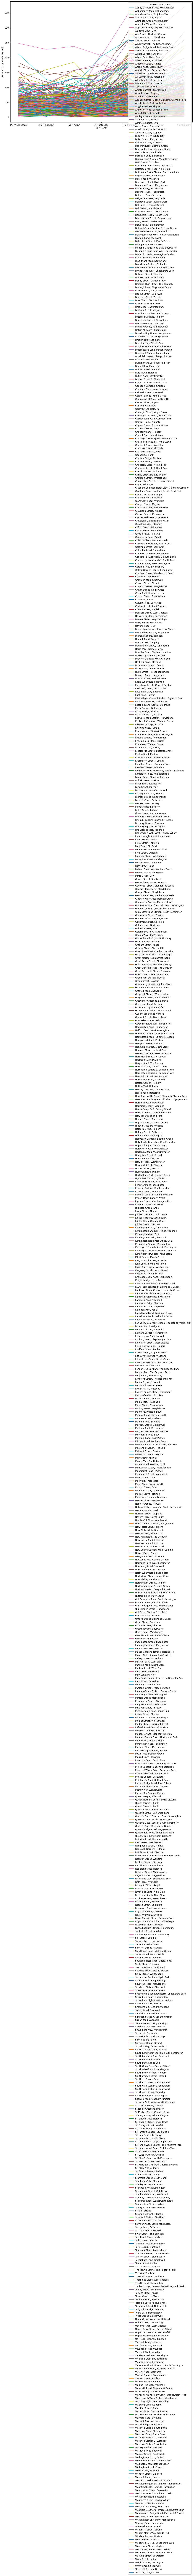

In [18]:
# Create Pivot table for the Demand/Time for each station Graph
startPivot = counterDailyJourneyStarts.pivot(index="Day/Month", columns="StartStation Name", values="size")
startPivot.plot(kind="line", figsize=(15,10), ylabel="Number of Journeys Started")